# Car Price Prediction
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

**Price:** suggested retail price of the used 2005 GM car in excellent condition.

**Mileage:** number of miles the car has been driven.

**Make:** manufacturer of the car such as Saturn, Pontiac, and Chevrolet.

**Model:** specific models for each car manufacturer such as Ion, Vibe, Cavalier.

**Trim (of car):** specific type of car model such as SE Sedan 4D, Quad Coupe 2D.

**Type:** body type such as sedan, coupe, etc.

**Cylinder:** number of cylinders in the engine.

**Liter:** a more specific measure of engine size.

**Doors:** number of doors.

**Cruise:** indicator variable representing whether the car has cruise control (1 = cruise).

**Sound:** indicator variable representing whether the car has upgraded speakers (1 = upgraded).

**Leather:** indicator variable representing whether the car has leather seats (1 = leather).

# Tasks, Part 1
1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Tasks, Part 2
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

# Tasks, Hard Mode
1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('car_data.csv')

# Data cleaning

In [3]:
df.shape

(804, 12)

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(804, 12)

In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
# Mileage
iqr = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Mileage'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Mileage'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 10589.5
Upper Threshold : 41097.25
Lower Threshold : -1260.75


In [10]:
df['Mileage'] = df['Mileage'].clip(-1260.75, 41097.25)

In [11]:
# Liter
iqr = df['Liter'].quantile(0.75) - df['Liter'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Liter'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Liter'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 1.5999999999999996
Upper Threshold : 6.199999999999999
Lower Threshold : -0.1999999999999993


# EDA

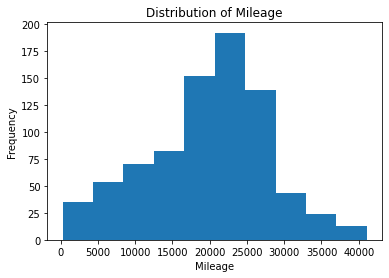

In [12]:
# Mileage
plt.hist(df['Mileage'], bins = 10)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

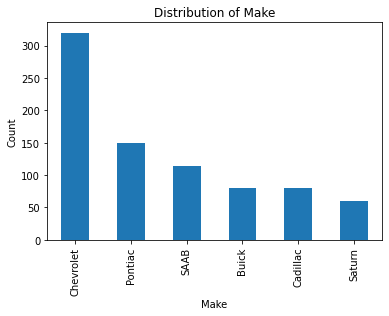

In [13]:
# Make
df['Make'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

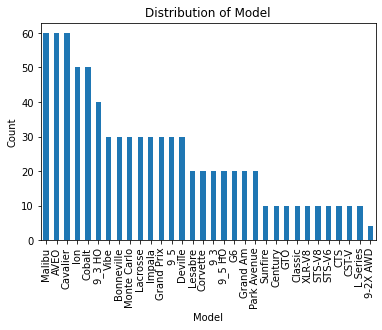

In [14]:
# Model
df['Model'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

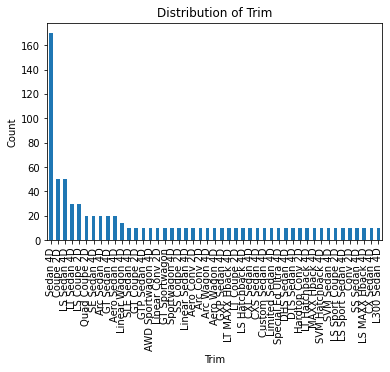

In [15]:
# Trim
df['Trim'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Trim')
plt.xlabel('Trim')
plt.ylabel('Count')
plt.show()

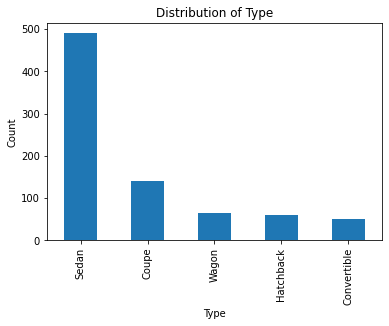

In [16]:
# Type
df['Type'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

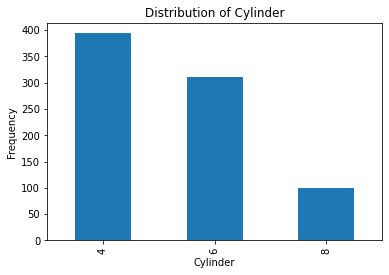

In [17]:
# Cylinder
df['Cylinder'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Cylinder')
plt.xlabel('Cylinder')
plt.ylabel('Frequency')
plt.show()

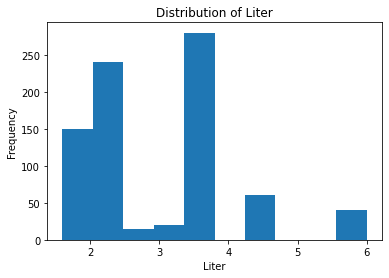

In [18]:
# Liter
plt.hist(df['Liter'], bins = 10)
plt.title('Distribution of Liter')
plt.xlabel('Liter')
plt.ylabel('Frequency')
plt.show()

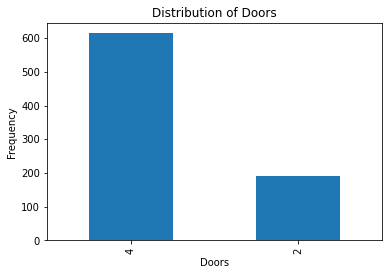

In [19]:
# Doors
df['Doors'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Doors')
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.show()

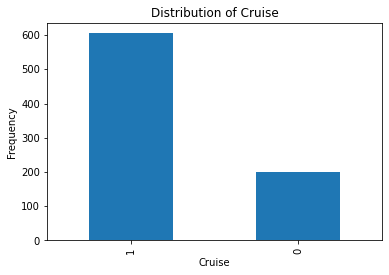

In [20]:
# Cruise
df['Cruise'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Cruise')
plt.xlabel('Cruise')
plt.ylabel('Frequency')
plt.show()

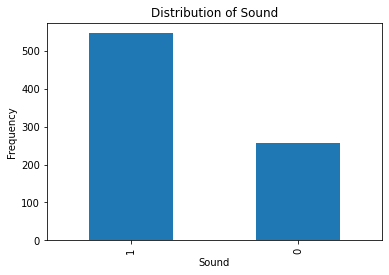

In [21]:
# Sound
df['Sound'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Sound')
plt.xlabel('Sound')
plt.ylabel('Frequency')
plt.show()

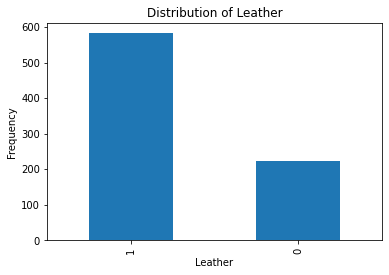

In [22]:
# Leather
df['Leather'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Leather')
plt.xlabel('Leather')
plt.ylabel('Frequency')
plt.show()

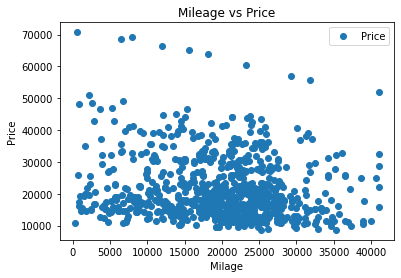

In [23]:
# Mileage vs Price
df.plot(x = 'Mileage', y = 'Price', style = 'o')
plt.title('Mileage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()

In [24]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


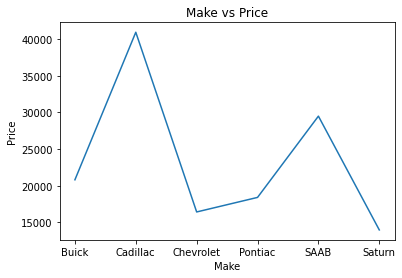

In [25]:
# Make vs Price
df.groupby('Make')['Price'].mean().plot()
plt.title('Make vs Price')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

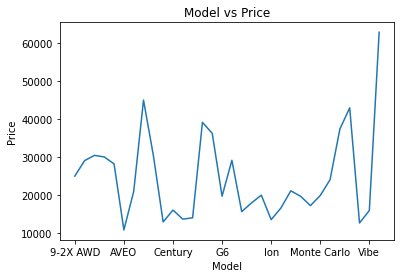

In [26]:
# Model vs Price
df.groupby('Model')['Price'].mean().plot()
plt.title('Model vs Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

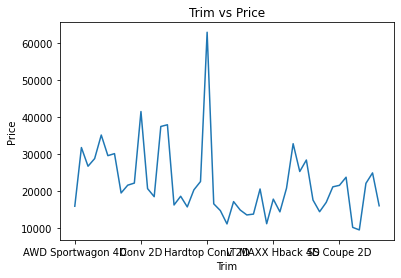

In [27]:
# Trim vs Price
df.groupby('Trim')['Price'].mean().plot()
plt.title('Trim vs Price')
plt.xlabel('Trim')
plt.ylabel('Price')
plt.show()

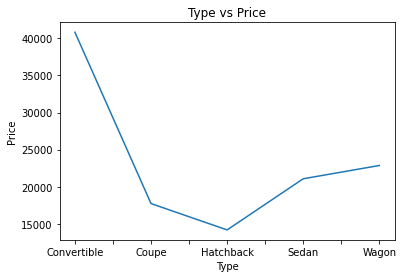

In [28]:
# Type vs Price
df.groupby('Type')['Price'].mean().plot()
plt.title('Type vs Price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

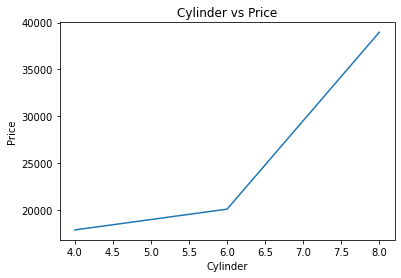

In [29]:
# Cylinder vs Price
df.groupby('Cylinder')['Price'].mean().plot()
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [30]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


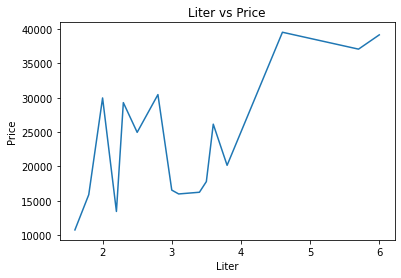

In [31]:
# Liter vs Price
df.groupby('Liter')['Price'].mean().plot()
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [32]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


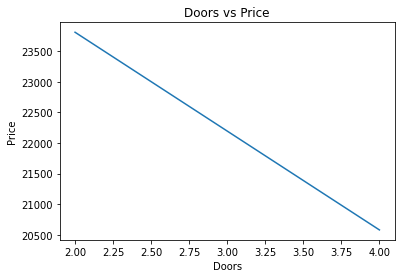

In [33]:
# Doors vs Price
df.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

In [34]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


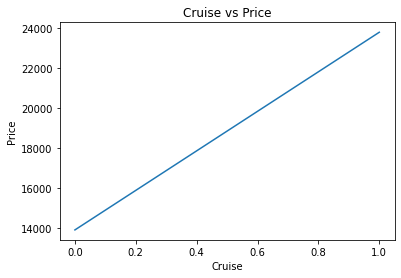

In [35]:
# Cruise vs Price
df.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [36]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


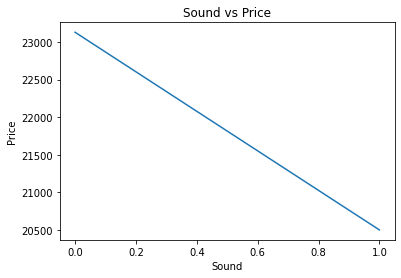

In [37]:
# Sound vs Price
df.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

In [38]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


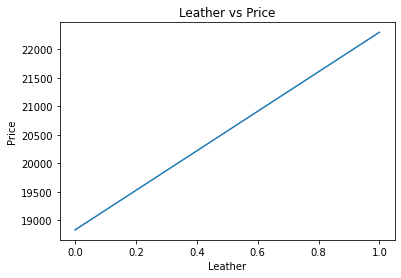

In [39]:
# Leather vs Price
df.groupby('Leather')['Price'].mean().plot()
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

In [40]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [41]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569086,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


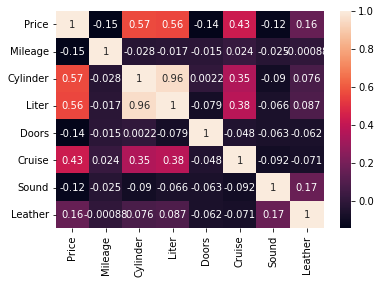

In [42]:
sns.heatmap(df.corr(), annot = True)
plt.show()

As we can see from the correlation table above, only Cylinder, Liter, Cruise have positive correlation and these features can only be used in linear regression model. Since, the problem statement asks specific features to be considered for model training, we'll go with the problem statement.

# Task 1

# Data preprocessing

In [43]:
X = df[['Mileage']].values
y = df['Price'].values

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 55)

In [45]:
X_train.shape, X_test.shape

((562, 1), (242, 1))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training

In [47]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
print(regressor.intercept_)

21364.51518441336


In [49]:
print(regressor.coef_)

[-1088.92366269]


In [50]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = -1088.9237 * x + 21364.5152


# Prediction

In [51]:
y_pred = regressor.predict(X_test_scaled)

In [52]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,16472.897648,21080.468901
1,16927.779761,23563.549342
2,26775.032089,21742.597131
3,24852.495281,20929.242903
4,11873.533995,20187.850475
...,...,...
237,20109.904121,20919.019547
238,20512.094091,21749.899528
239,23573.822002,22303.155661
240,12045.920705,21417.574090


# Evaluation of model

In [53]:
print('R2 - SCORE : ',regressor.score(X_test_scaled,y_test))

R2 - SCORE :  0.03528379018590211


The R2 Score for Mileage vs Price Linear Regression Model is 0.035 which is very low. So, this model is unfit to predict the price of the car.

The following is the regression plot between Mileage and Price.

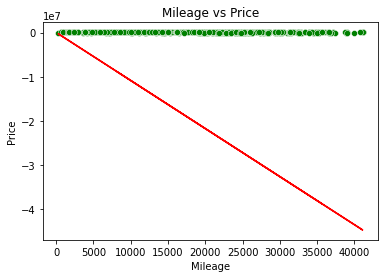

In [54]:
sns.scatterplot(x = df['Mileage'], y = df['Price'], data = df, color = 'green')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Task 2

# Data preprocessing

In [55]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y = df['Price'].values

In [56]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)

In [57]:
X_train.shape, X_test.shape

((562, 7), (242, 7))

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training

In [59]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
print(regressor.intercept_)

21073.614522500695


In [61]:
print(regressor.coef_)

[-1264.03089609  5002.28183353  -984.60964087 -1288.27067777
  2759.50303585  -872.60550238  1296.86368176]


In [62]:
coef = pd.DataFrame(regressor.coef_, ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns = ['coefficient'])
coef

,coefficient
Mileage,-1264.030896
Cylinder,5002.281834
Liter,-984.609641
Doors,-1288.270678
Cruise,2759.503036
Sound,-872.605502
Leather,1296.863682


In [63]:
print('Linear Regression Equation: y = {:.4f}*Mileage + {:.4f}*Cylinder + {:.4f}*Liter + {:.4f}*Doors + {:.4f}*Cruise + {:.4f}*Sound + {:.4f}*Leather + {:.4f}'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6],regressor.intercept_))

Linear Regression Equation: y = -1264.0309*Mileage + 5002.2818*Cylinder + -984.6096*Liter + -1288.2707*Doors + 2759.5030*Cruise + -872.6055*Sound + 1296.8637*Leather + 21073.6145


# Prediction

In [64]:
y_pred = regressor.predict(X_test_scaled)

In [65]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,16472.897648,24111.483649
1,22625.073566,25393.776241
2,12594.183013,12683.921586
3,26789.832608,17033.742025
4,42741.523666,28901.587147
...,...,...
237,27256.494512,14494.439781
238,41419.037262,33466.017889
239,25589.983155,24051.145081
240,10971.095614,19815.116523


# Evaluation of model

In [66]:
print('R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

R2 - SCORE :  0.49753581768497546


The R2 Score of this model is 0.49 which is average. So, this model is not a better model to predict the price of the car.

# Best combination of factors

In [67]:
from itertools import combinations
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

In [68]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],2)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 55)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder') R2 - SCORE :  0.3645253669672359
('Mileage', 'Liter') R2 - SCORE :  0.3656170357853201
('Mileage', 'Doors') R2 - SCORE :  0.04154835234026888
('Mileage', 'Cruise') R2 - SCORE :  0.2335527380276905
('Mileage', 'Sound') R2 - SCORE :  0.042918952159853196
('Mileage', 'Leather') R2 - SCORE :  0.061271602518597756
('Cylinder', 'Liter') R2 - SCORE :  0.3429693856251208
('Cylinder', 'Doors') R2 - SCORE :  0.3333994923450937
('Cylinder', 'Cruise') R2 - SCORE :  0.38631528669168413
('Cylinder', 'Sound') R2 - SCORE :  0.3375381273047545
('Cylinder', 'Leather') R2 - SCORE :  0.35928007859599187
('Liter', 'Doors') R2 - SCORE :  0.3287927916748804
('Liter', 'Cruise') R2 - SCORE :  0.38397129345167935
('Liter', 'Sound') R2 - SCORE :  0.3365986174267718
('Liter', 'Leather') R2 - SCORE :  0.3577011128277019
('Doors', 'Cruise') R2 - SCORE :  0.1997238571898372
('Doors', 'Sound') R2 - SCORE :  0.012721895119510385
('Doors', 'Leather') R2 - SCORE :  0.03021126850083411
('Cruise', 

From the above R2 scores between all combinations of 2 features, Cylinder and Cruise has the highest R2 score of 0.386.

In [69]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],3)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 55)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter') R2 - SCORE :  0.3692359627673292
('Mileage', 'Cylinder', 'Doors') R2 - SCORE :  0.35908137724911793
('Mileage', 'Cylinder', 'Cruise') R2 - SCORE :  0.41596606561800265
('Mileage', 'Cylinder', 'Sound') R2 - SCORE :  0.36364895587308166
('Mileage', 'Cylinder', 'Leather') R2 - SCORE :  0.3845879173819905
('Mileage', 'Liter', 'Doors') R2 - SCORE :  0.35561727469665216
('Mileage', 'Liter', 'Cruise') R2 - SCORE :  0.41489835260238617
('Mileage', 'Liter', 'Sound') R2 - SCORE :  0.36399284879242577
('Mileage', 'Liter', 'Leather') R2 - SCORE :  0.38423545365739364
('Mileage', 'Doors', 'Cruise') R2 - SCORE :  0.2407952729394942
('Mileage', 'Doors', 'Sound') R2 - SCORE :  0.05032330516211547
('Mileage', 'Doors', 'Leather') R2 - SCORE :  0.06579141953418843
('Mileage', 'Cruise', 'Sound') R2 - SCORE :  0.24003796328340543
('Mileage', 'Cruise', 'Leather') R2 - SCORE :  0.26271366839039045
('Mileage', 'Sound', 'Leather') R2 - SCORE :  0.07782750386892323
('Cylinder', 

From the above R2 scores between all combinations of 3 features, Mileage, Cylinder and Cruise has the highest R2 score of 0.415.

In [70]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],4)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors') R2 - SCORE :  0.41772165240641623
('Mileage', 'Cylinder', 'Liter', 'Cruise') R2 - SCORE :  0.4477269902821571
('Mileage', 'Cylinder', 'Liter', 'Sound') R2 - SCORE :  0.4063689435184856
('Mileage', 'Cylinder', 'Liter', 'Leather') R2 - SCORE :  0.4197791749748233
('Mileage', 'Cylinder', 'Doors', 'Cruise') R2 - SCORE :  0.4637358032434381
('Mileage', 'Cylinder', 'Doors', 'Sound') R2 - SCORE :  0.4255634636004123
('Mileage', 'Cylinder', 'Doors', 'Leather') R2 - SCORE :  0.43437944370392
('Mileage', 'Cylinder', 'Cruise', 'Sound') R2 - SCORE :  0.45090603168810195
('Mileage', 'Cylinder', 'Cruise', 'Leather') R2 - SCORE :  0.4748243034606807
('Mileage', 'Cylinder', 'Sound', 'Leather') R2 - SCORE :  0.4278816265414255
('Mileage', 'Liter', 'Doors', 'Cruise') R2 - SCORE :  0.4414669175654654
('Mileage', 'Liter', 'Doors', 'Sound') R2 - SCORE :  0.4041165421908185
('Mileage', 'Liter', 'Doors', 'Leather') R2 - SCORE :  0.40965033063923373
('Mileage', 'Liter

From the above R2 scores between all combinations of 4 features, Mileage, Cylinder, Cruise and Leather has the highest R2 score of 0.474.

In [71]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],5)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise') R2 - SCORE :  0.4633333094172617
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound') R2 - SCORE :  0.42583413043409934
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Leather') R2 - SCORE :  0.4344336490241234
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound') R2 - SCORE :  0.45159894279722324
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather') R2 - SCORE :  0.4748793412142617
('Mileage', 'Cylinder', 'Liter', 'Sound', 'Leather') R2 - SCORE :  0.4299160126721553
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.46947961640629055
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather') R2 - SCORE :  0.487602264009799
('Mileage', 'Cylinder', 'Doors', 'Sound', 'Leather') R2 - SCORE :  0.44709441987397924
('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.48239490745492575
('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.44901854075801206
('Mileage', 'Liter', 'Doors', 'Cruise', 'Leather') R2 -

From the above R2 scores between all combinations of 5 features, Mileage, Cylinder, Cruise, Doors and Leather has the highest R2 score of 0.487.

In [72]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],6)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.4691058968535057
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather') R2 - SCORE :  0.4875465427836566
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather') R2 - SCORE :  0.4472023633739146
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.48264619183766544
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.4976141707660032
('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.47664532884272504
('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.4703781182001826


From the above R2 scores between all combinations of 6 features, Mileage, Cylinder, Doors, Cruise, Sound and Leather has the highest R2 score of 0.497.

As we can see from the R2 scores calculated from all the combinations of the features, when we take more features into consideration for model training, the R2 score gradually increases.

# Task 3

In [73]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Make

In [74]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [75]:
df1 = pd.get_dummies(df['Make'])

In [76]:
df1.head()

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [77]:
#for i in list(combinations(['Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Buick', 'Make_Cadillac', 'Make_Saturn'],2)):
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],2)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac') R2 - SCORE :  0.2432465059336273
('Chevrolet', 'SAAB') R2 - SCORE :  0.17910836497021454
('Chevrolet', 'Buick') R2 - SCORE :  0.16114967411509118
('Chevrolet', 'Cadillac') R2 - SCORE :  0.4975638044229199
('Chevrolet', 'Saturn') R2 - SCORE :  0.2782893467614246
('Pontiac', 'SAAB') R2 - SCORE :  0.08949266286588853
('Pontiac', 'Buick') R2 - SCORE :  0.018305412020958256
('Pontiac', 'Cadillac') R2 - SCORE :  0.4613472872262009
('Pontiac', 'Saturn') R2 - SCORE :  0.09229477855715273
('SAAB', 'Buick') R2 - SCORE :  0.08078564531262356
('SAAB', 'Cadillac') R2 - SCORE :  0.6246818933510194
('SAAB', 'Saturn') R2 - SCORE :  0.12432479154797471
('Buick', 'Cadillac') R2 - SCORE :  0.4638852914990269
('Buick', 'Saturn') R2 - SCORE :  0.05741169247570266
('Cadillac', 'Saturn') R2 - SCORE :  0.4912318626703601


In [78]:
#for i in list(combinations(['Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Buick', 'Make_Cadillac', 'Make_Saturn'],2)):
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],3)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB') R2 - SCORE :  0.2508428148235958
('Chevrolet', 'Pontiac', 'Buick') R2 - SCORE :  0.2825253156645219
('Chevrolet', 'Pontiac', 'Cadillac') R2 - SCORE :  0.5141297866833663
('Chevrolet', 'Pontiac', 'Saturn') R2 - SCORE :  0.4582101549531279
('Chevrolet', 'SAAB', 'Buick') R2 - SCORE :  0.18571038331595469
('Chevrolet', 'SAAB', 'Cadillac') R2 - SCORE :  0.6253175464246559
('Chevrolet', 'SAAB', 'Saturn') R2 - SCORE :  0.28392439215689647
('Chevrolet', 'Buick', 'Cadillac') R2 - SCORE :  0.49607630380264267
('Chevrolet', 'Buick', 'Saturn') R2 - SCORE :  0.3146998270259811
('Chevrolet', 'Cadillac', 'Saturn') R2 - SCORE :  0.561752478134973
('Pontiac', 'SAAB', 'Buick') R2 - SCORE :  0.08930730199674553
('Pontiac', 'SAAB', 'Cadillac') R2 - SCORE :  0.6266875391498561
('Pontiac', 'SAAB', 'Saturn') R2 - SCORE :  0.14182370258790555
('Pontiac', 'Buick', 'Cadillac') R2 - SCORE :  0.46469605495318733
('Pontiac', 'Buick', 'Saturn') R2 - SCORE :  0.09810077733313749
('Po

In [79]:
#for i in list(combinations(['Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Buick', 'Make_Cadillac', 'Make_Saturn'],2)):
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],4)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB', 'Buick') R2 - SCORE :  0.28182474971023164
('Chevrolet', 'Pontiac', 'SAAB', 'Cadillac') R2 - SCORE :  0.6257773366992112
('Chevrolet', 'Pontiac', 'SAAB', 'Saturn') R2 - SCORE :  0.46088933300099333
('Chevrolet', 'Pontiac', 'Buick', 'Cadillac') R2 - SCORE :  0.5103385395027842
('Chevrolet', 'Pontiac', 'Buick', 'Saturn') R2 - SCORE :  0.5777528108279562
('Chevrolet', 'Pontiac', 'Cadillac', 'Saturn') R2 - SCORE :  0.6187557957516077
('Chevrolet', 'SAAB', 'Buick', 'Cadillac') R2 - SCORE :  0.638867966801195
('Chevrolet', 'SAAB', 'Buick', 'Saturn') R2 - SCORE :  0.3114647960302338
('Chevrolet', 'SAAB', 'Cadillac', 'Saturn') R2 - SCORE :  0.6485458142637319
('Chevrolet', 'Buick', 'Cadillac', 'Saturn') R2 - SCORE :  0.5644474243099219
('Pontiac', 'SAAB', 'Buick', 'Cadillac') R2 - SCORE :  0.6471711817891838
('Pontiac', 'SAAB', 'Buick', 'Saturn') R2 - SCORE :  0.14210385205826026
('Pontiac', 'SAAB', 'Cadillac', 'Saturn') R2 - SCORE :  0.6380246446483007
('Ponti

In [80]:
#for i in list(combinations(['Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Buick', 'Make_Cadillac', 'Make_Saturn'],2)):
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],5)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac') R2 - SCORE :  0.6534390562958852
('Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Saturn') R2 - SCORE :  0.6534390562958852
('Chevrolet', 'Pontiac', 'SAAB', 'Cadillac', 'Saturn') R2 - SCORE :  0.6534390562958852
('Chevrolet', 'Pontiac', 'Buick', 'Cadillac', 'Saturn') R2 - SCORE :  0.6534390562958852
('Chevrolet', 'SAAB', 'Buick', 'Cadillac', 'Saturn') R2 - SCORE :  0.6534390562958852
('Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn') R2 - SCORE :  0.6534390562958852


Model

In [81]:
df['Model'].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [82]:
df1 = pd.get_dummies(df['Model'])

In [83]:
df1.head()

,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#for i in list(combinations(['Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Buick', 'Make_Cadillac', 'Make_Saturn'],2)):
for i in list(combinations(['Malibu', 'AVEO', 'Cavalier', 'Ion', 'Cobalt', '9_3 HO', 'Vibe', 'Bonneville', 'Monte Carlo', 'Lacrosse', 'Impala', 'Grand Prix', '9_5', 'Deville', 'Lesabre', 'Corvette', '9_3', '9_5 HO', 'G6', 'Grand Am', 'Park Avenue', 'Sunfire', 'Century', 'GTO', 'Classic', 'XLR-V8', 'STS-V8', 'STS-V6', 'CTS', 'CST-V', 'L Series', '9-2X AWD'],2)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Malibu', 'AVEO') R2 - SCORE :  0.09761026100934644
('Malibu', 'Cavalier') R2 - SCORE :  0.04754065935829299
('Malibu', 'Ion') R2 - SCORE :  0.06924219241467322
('Malibu', 'Cobalt') R2 - SCORE :  0.052523989195553455
('Malibu', '9_3 HO') R2 - SCORE :  0.03712684996631632
('Malibu', 'Vibe') R2 - SCORE :  0.015445203175475375
('Malibu', 'Bonneville') R2 - SCORE :  0.003616847550207747
('Malibu', 'Monte Carlo') R2 - SCORE :  0.005461458733640234
('Malibu', 'Lacrosse') R2 - SCORE :  0.0035629467762869904
('Malibu', 'Impala') R2 - SCORE :  0.005474268260299953
('Malibu', 'Grand Prix') R2 - SCORE :  0.008417179094322158
('Malibu', '9_5') R2 - SCORE :  0.022861375270450845
('Malibu', 'Deville') R2 - SCORE :  0.08975847882303822
('Malibu', 'Lesabre') R2 - SCORE :  0.005037566844059871
('Malibu', 'Corvette') R2 - SCORE :  0.08914449018477477
('Malibu', '9_3') R2 - SCORE :  0.017342209174472822
('Malibu', '9_5 HO') R2 - SCORE :  0.009852994444014107
('Malibu', 'G6') R2 - SCORE :  0.004565713704

Type

In [85]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [86]:
df3 = pd.get_dummies(df['Type'])

In [87]:
df3.head()

,Convertible,Coupe,Hatchback,Sedan,Wagon
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [88]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],2)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe') R2 - SCORE :  0.06801663300363014
('Sedan', 'Wagon') R2 - SCORE :  -0.003338554443318875
('Sedan', 'Hatchback') R2 - SCORE :  0.04268910454048502
('Sedan', 'Convertible') R2 - SCORE :  0.2504292849140525
('Coupe', 'Wagon') R2 - SCORE :  0.03155610080950699
('Coupe', 'Hatchback') R2 - SCORE :  0.07782946678336133
('Coupe', 'Convertible') R2 - SCORE :  0.24957854198437235
('Wagon', 'Hatchback') R2 - SCORE :  0.030480973517909682
('Wagon', 'Convertible') R2 - SCORE :  0.2423586953554948
('Hatchback', 'Convertible') R2 - SCORE :  0.25674451929200304


In [89]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],3)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe', 'Wagon') R2 - SCORE :  0.07651270806306065
('Sedan', 'Coupe', 'Hatchback') R2 - SCORE :  0.20065422955834433
('Sedan', 'Coupe', 'Convertible') R2 - SCORE :  0.2512068712536061
('Sedan', 'Wagon', 'Hatchback') R2 - SCORE :  0.04134989298249059
('Sedan', 'Wagon', 'Convertible') R2 - SCORE :  0.27969172609069615
('Sedan', 'Hatchback', 'Convertible') R2 - SCORE :  0.26342137041601954
('Coupe', 'Wagon', 'Hatchback') R2 - SCORE :  0.07746768917318148
('Coupe', 'Wagon', 'Convertible') R2 - SCORE :  0.25588724776601435
('Coupe', 'Hatchback', 'Convertible') R2 - SCORE :  0.28024137760184054
('Wagon', 'Hatchback', 'Convertible') R2 - SCORE :  0.2637076687961011


In [90]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],4)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 555)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe', 'Wagon', 'Hatchback') R2 - SCORE :  0.2837553496242623
('Sedan', 'Coupe', 'Wagon', 'Convertible') R2 - SCORE :  0.28375534962426197
('Sedan', 'Coupe', 'Hatchback', 'Convertible') R2 - SCORE :  0.28375534962426197
('Sedan', 'Wagon', 'Hatchback', 'Convertible') R2 - SCORE :  0.28375534962426197
('Coupe', 'Wagon', 'Hatchback', 'Convertible') R2 - SCORE :  0.28375534962426197


As we can see from the above R2 scores calculated for Make, Model and Type after performing One Hot Encoder on those features, only Make shows some reasonable R2 scores to be considered for model training.